# Data Preparation
Tasks

    1.Data selection

    2.Data preprocessing

    3.Feature engineering

    4.Dimensionality reduction

In [96]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
# Import StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.manifold import TSNE
from datetime import datetime, date
from sklearn.metrics import  accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
warnings.filterwarnings('ignore')


    
## 1.Clean_Preprocess_selection Data

In [5]:
# Read spreadsheet and assign it to sml_dataset
ml_dataset= pd.read_csv('C:/Users/rzouga/Desktop/ALLINHERE/Assignement/Sama/ml_dataset.csv')
# code will replace the special character to nan and then drop the columns 
ml_dataset['native-country'] = ml_dataset['native-country'].replace('?',np.nan)
ml_dataset['worklass'] = ml_dataset['worklass'].replace('?',np.nan)
ml_dataset['occupation'] = ml_dataset['occupation'].replace('?',np.nan)#dropping the NaN rows now 
ml_dataset.dropna(how='any',inplace=True)

In [6]:
ml_dataset.columns

Index(['age', 'worklass', 'fnlwgt', 'education', 'education-num',
       'martial-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'id'],
      dtype='object')

In [7]:
ml_dataset.shape

(30162, 16)

## Keep clean columns :

In [10]:
list_to_keep= ['age', 'worklass', 'fnlwgt', 'education', 'education-num',
       'martial-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income']

In [11]:
clean_reduced_df= ml_dataset[list_to_keep].copy()
clean_reduced_df.shape

(30162, 15)

# EDA After Cleaning :


In [12]:
clean_reduced_df.head(3)

,age,worklass,fnlwgt,education,education-num,martial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [13]:
clean_reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   worklass        30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   martial-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [14]:
clean_reduced_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# 2.Data preprocessing
## Log normalization

Transformation Normally distributed features are an assumption in Statistical algorithms. Deep learning & Regression-type algorithms also benefit from normally distributed data. Transformation is required to treat the skewed features and make them normally distributed. Right skewed features can be transformed to normality with Square Root/ Cube Root/ Logarithm transformation.
Helps with skewness No predetermined range for scaled data Useful only **on non-zero, non-negative data**


In [15]:
clean_reduced_df.var(skipna = True)

age               1.725194e+02
fnlwgt            1.116255e+10
education-num     6.502474e+00
capital-gain      5.485397e+07
capital-loss      1.634572e+05
hours-per-week    1.435200e+02
dtype: float64

### Those 2 columns have big varinace let's see if we can reduce the variance  
    fnlwgt            1.116255e+10
    capital-gain      5.485397e+07
    capital-loss      1.634572e+05

#### fnlwgt

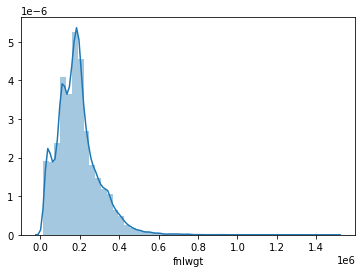

In [17]:
ax = sns.distplot(clean_reduced_df["fnlwgt"])

In [18]:
# Print out the variance 
print(clean_reduced_df['fnlwgt'].var())

# Apply the log normalization function 
clean_reduced_df['fnlwgt_log'] = np.log(clean_reduced_df['fnlwgt'])

# Check the variance of the normalized 
print(clean_reduced_df['fnlwgt_log'].var())

11162550392.80617
0.39778326834120575


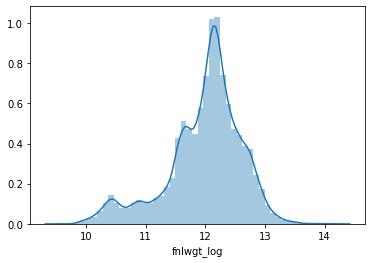

In [19]:
ax = sns.distplot(clean_reduced_df['fnlwgt_log'])

#### capital-gain

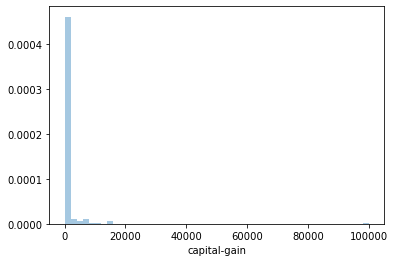

In [20]:
ax = sns.distplot(clean_reduced_df["capital-gain"])

In [29]:
# Print out the variance 
print(clean_reduced_df['capital-gain'].var())

# Apply the log normalization function 
clean_reduced_df['capital-gain_log'] = np.log(clean_reduced_df['capital-gain']+1)

# Check the variance of the normalized 
print(clean_reduced_df['capital-gain_log'].var())

54853968.42891356
6.103460488473225


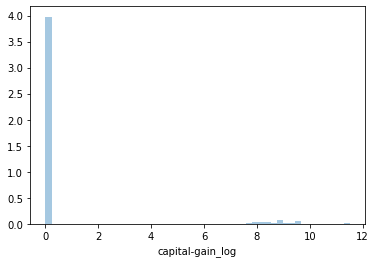

In [30]:
ax = sns.distplot(clean_reduced_df['capital-gain_log'])

#### capital-loss 

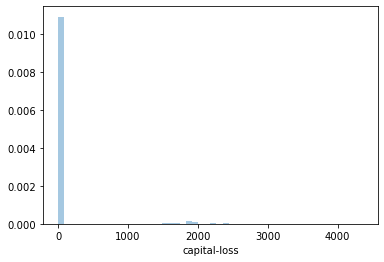

In [31]:
ax = sns.distplot(clean_reduced_df["capital-loss"])

In [35]:
# Print out the variance
print(clean_reduced_df['capital-loss'].var())

# Apply the log normalization function t
clean_reduced_df['capital-loss _log'] = np.log(clean_reduced_df['capital-loss']+1)

# Check the variance of the normalized 
print(clean_reduced_df['capital-loss _log'].var())

163457.17237785677
2.5440568171510294


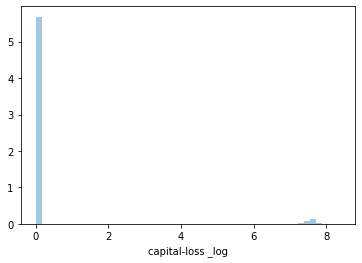

In [37]:
ax = sns.distplot(clean_reduced_df["capital-loss _log"])

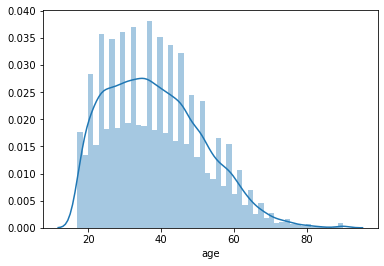

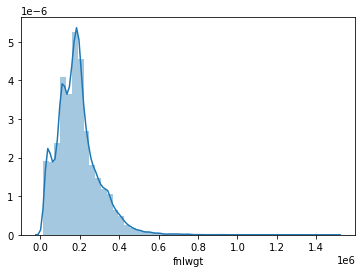

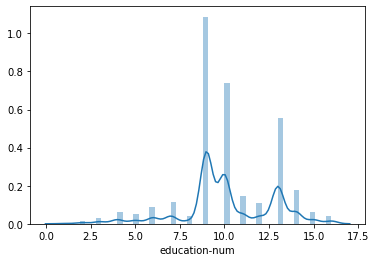

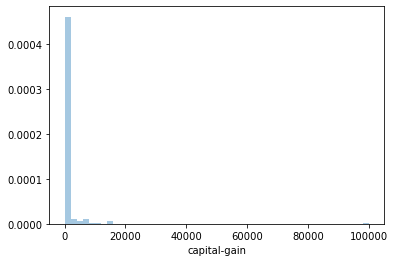

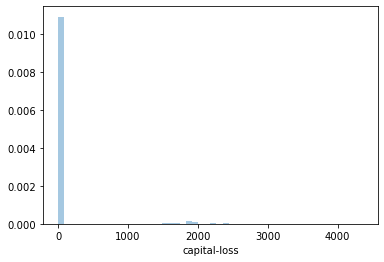

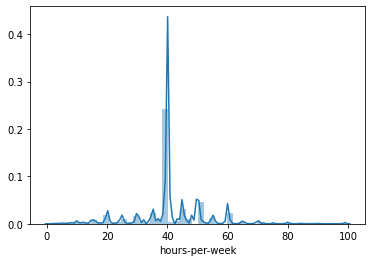

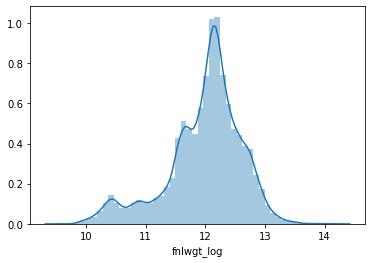

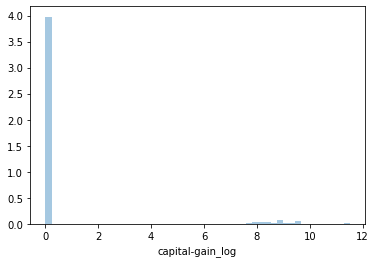

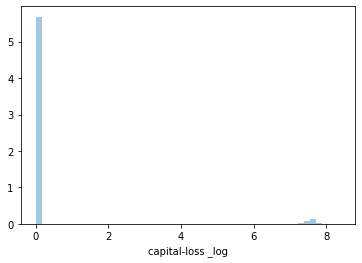

In [38]:
# select the float columns
num_columns = clean_reduced_df.select_dtypes(include=['int64','float64']).columns
# Create a histogram
# create distplots
for column in num_columns:
    plt.figure()         
    sns.distplot(clean_reduced_df[column])

# 3.Feature Engineering
Feature engineering is the act of taking raw data and extracting features from it that are suitable for tasks like machine learning
## Encoding categorical variables
   

In [39]:
# select non-numeric columns
cat_columns = clean_reduced_df.select_dtypes(exclude=['int64','float64']).columns
cat_columns

Index(['worklass', 'education', 'martial-status', 'occupation', 'relationship',
       'race', 'sex', 'native-country', 'income'],
      dtype='object')

# Create pipeline :Cat colmuns 

In [40]:
fill_missing_then_one_hot_encoder = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='manquante',add_indicator=True),
    OneHotEncoder(handle_unknown='ignore')
)

fill_missing_then_one_hot_encoder.fit(clean_reduced_df[cat_columns])

x_encoded =fill_missing_then_one_hot_encoder.transform(clean_reduced_df[cat_columns])

print('C\'est bon')

C'est bon


In [41]:
x_encoded.toarray()

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

# Encode Target  :


In [42]:
clean_reduced_df["income"] = clean_reduced_df["income"].apply(lambda x:0 if 
                        x=='<=50K' else 1)
clean_reduced_df["income"].unique()

array([0, 1], dtype=int64)

In [44]:
clean_reduced_df["income"].value_counts()

0    22654
1     7508
Name: income, dtype: int64

# Put all preprocess tasks 

In [45]:
# Read spreadsheet and assign it to sml_dataset
ml_dataset= pd.read_csv('C:/Users/rzouga/Desktop/ALLINHERE/Assignement/Sama/ml_dataset.csv')
# code will replace the special character to nan and then drop the columns 
ml_dataset['native-country'] = ml_dataset['native-country'].replace('?',np.nan)
ml_dataset['worklass'] = ml_dataset['worklass'].replace('?',np.nan)
ml_dataset['occupation'] = ml_dataset['occupation'].replace('?',np.nan)#dropping the NaN rows now 
ml_dataset.dropna(how='any',inplace=True)

list_to_keep= ['age', 'worklass', 'fnlwgt', 'education', 'education-num',
       'martial-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income']
clean_reduced_df= ml_dataset[list_to_keep].copy()

clean_reduced_df.shape

(30162, 15)

# Transformation :

In [46]:
clean_reduced_df['fnlwgt_log'] = np.log(clean_reduced_df['fnlwgt'])
clean_reduced_df['capital-gain_log'] = np.log(clean_reduced_df['capital-gain']+1)
clean_reduced_df['capital-loss _log'] = np.log(clean_reduced_df['capital-loss']+1)
clean_reduced_df.columns

Index(['age', 'worklass', 'fnlwgt', 'education', 'education-num',
       'martial-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'fnlwgt_log', 'capital-gain_log', 'capital-loss _log'],
      dtype='object')

In [49]:
list_final= ['age', 'worklass',  'education', 'education-num',
       'martial-status', 'occupation', 'relationship', 'race', 'sex',
         'hours-per-week', 'native-country',
       'income', 'fnlwgt_log', 'capital-gain_log', 'capital-loss _log']
clean_reduced_final= clean_reduced_df[list_final].copy()

In [51]:
clean_reduced_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                30162 non-null  int64  
 1   worklass           30162 non-null  object 
 2   education          30162 non-null  object 
 3   education-num      30162 non-null  int64  
 4   martial-status     30162 non-null  object 
 5   occupation         30162 non-null  object 
 6   relationship       30162 non-null  object 
 7   race               30162 non-null  object 
 8   sex                30162 non-null  object 
 9   hours-per-week     30162 non-null  int64  
 10  native-country     30162 non-null  object 
 11  income             30162 non-null  object 
 12  fnlwgt_log         30162 non-null  float64
 13  capital-gain_log   30162 non-null  float64
 14  capital-loss _log  30162 non-null  float64
dtypes: float64(3), int64(3), object(9)
memory usage: 3.7+ MB


In [52]:
clean_reduced_final.isnull().sum()

age                  0
worklass             0
education            0
education-num        0
martial-status       0
occupation           0
relationship         0
race                 0
sex                  0
hours-per-week       0
native-country       0
income               0
fnlwgt_log           0
capital-gain_log     0
capital-loss _log    0
dtype: int64

# Target vs predictors 


In [54]:
# Create arrays for the features and the response variable
classification_cible = "income"
y = clean_reduced_final[classification_cible]
X = clean_reduced_final.drop(['income'], axis=1)
# Split the dataset and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

6033 rows in test set vs. 24129 in training set. 14 Features.


## Num Vs cat columns 

In [55]:
# select the float columns
num_columns = X.select_dtypes(include=['int64','float64']).columns
# select non-numeric columns
cat_columns = X.select_dtypes(exclude=['int64','float64']).columns

##  Handle  Outliers : num_clumns 
### Percentage based outlier removal

One way to ensure a small portion of data is not having an overly adverse effect is by removing a certain percentage of the largest and/or smallest values in the column. This can be achieved by finding the relevant quantile and trimming the data using it with a mask. This approach is particularly useful if you are concerned that the highest values in your dataset should be avoided. When using this approach, you must remember that even if there are no outliers, this will still remove the same top N percentage from the dataset.

In [56]:
X[num_columns].describe()

,age,education-num,hours-per-week,fnlwgt_log,capital-gain_log,capital-loss _log
count,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,10.121312,40.931238,11.983762,0.743647,0.355226
std,13.134665,2.549995,11.979984,0.630701,2.470518,1.595010
min,17.000000,1.000000,1.000000,9.530175,0.000000,0.000000
25%,28.000000,9.000000,40.000000,11.675276,0.000000,0.000000
50%,37.000000,10.000000,40.000000,12.091924,0.000000,0.000000
75%,47.000000,13.000000,45.000000,12.378464,0.000000,0.000000
max,90.000000,16.000000,99.000000,14.210727,11.512925,8.379539


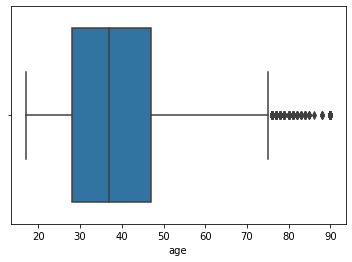

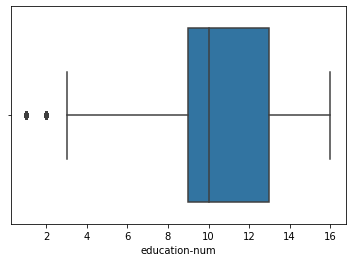

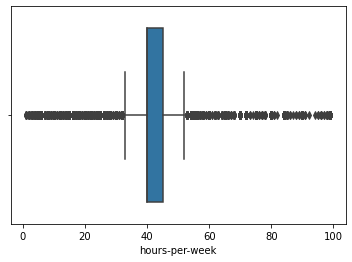

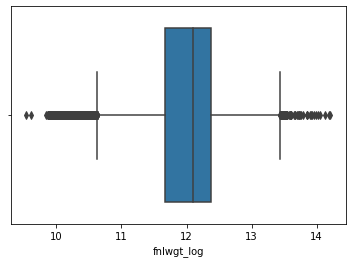

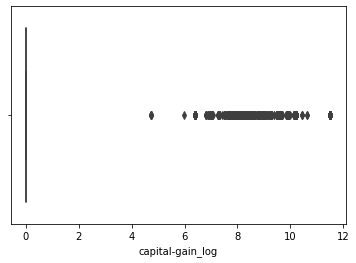

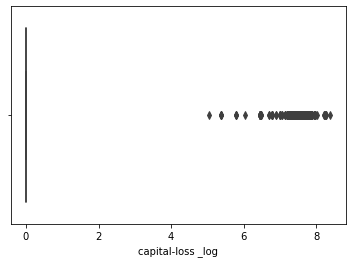

In [57]:
for i in list(X[num_columns].describe().columns):
    sns.boxplot(X[i].dropna())
    plt.show()



In [58]:
quantile = X[num_columns].quantile(0.95)
quantile

age                  62.000000
education-num        14.000000
hours-per-week       60.000000
fnlwgt_log           12.847069
capital-gain_log      8.519989
capital-loss _log     0.000000
Name: 0.95, dtype: float64

# Outlier before preprocessing

In [65]:
#import libraries
%matplotlib inline
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
import sklearn.metrics as metrics
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, accuracy_score
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
# Import StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.ensemble import AdaBoostClassifier,VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime, date
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
import tensorflow as tf 
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [66]:
from sklearn.neighbors import LocalOutlierFactor
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X.select_dtypes(include=['int64','float64']))

In [67]:
data=X.copy()
data['outlier_beforeprepocess'] =yhat

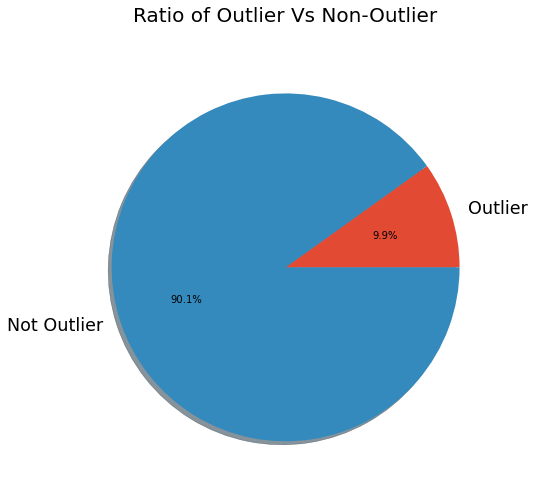

In [68]:
# select all rows that are not outliers
mask = yhat != -1
Outlier =len(data[data['outlier_beforeprepocess']==-1])
notOutlier = len(data[data['outlier_beforeprepocess']==1])

# Data to plot
labels = 'Outlier','Not Outlier'
sizes = [Outlier,notOutlier]

# Plot
plt.figure(figsize=(10,8))
plt.pie(sizes, labels=labels,
autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Ratio of Outlier Vs Non-Outlier\n', fontsize=20)
sns.set_context("paper", font_scale=2)

# Replace oulier

In [69]:
data.describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99])

,age,education-num,hours-per-week,fnlwgt_log,capital-gain_log,capital-loss _log,outlier_beforeprepocess
count,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,10.121312,40.931238,11.983762,0.743647,0.355226,0.801936
std,13.134665,2.549995,11.979984,0.630701,2.470518,1.595010,0.597420
min,17.000000,1.000000,1.000000,9.530175,0.000000,0.000000,-1.000000
1%,17.000000,3.000000,10.000000,10.209445,0.000000,0.000000,-1.000000
5%,20.000000,6.000000,20.000000,10.583924,0.000000,0.000000,-1.000000
25%,28.000000,9.000000,40.000000,11.675276,0.000000,0.000000,1.000000
50%,37.000000,10.000000,40.000000,12.091924,0.000000,0.000000,1.000000
75%,47.000000,13.000000,45.000000,12.378464,0.000000,0.000000,1.000000
95%,62.000000,14.000000,60.000000,12.847069,8.519989,0.000000,1.000000


In [74]:
class OutlierReplace(BaseEstimator,TransformerMixin):
    def __init__(self,factor=1.5):
        self.factor = factor

    def outlier_removal(self,X,y=None):
        X = pd.Series(X).copy()
        qmin=X.quantile(0.05)
        qmax=X.quantile(0.95)
        q1 = X.quantile(0.25)
        q3 = X.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (self.factor * iqr)
        upper_bound = q3 + (self.factor * iqr)
        #X.loc[((X < lower_bound) | (X > upper_bound))] = np.nan 
        X.loc[X < lower_bound] = qmin
        X.loc[X > upper_bound] = qmax
        return pd.Series(X)

    def fit(self,X,y=None):
        return self

    def transform(self,X,y=None):
        return X.apply(self.outlier_removal)

In [75]:
# identify outliers in the training dataset
lof = LocalOutlierFactor()
outlier_Replace=OutlierReplace()
datawithoutoulier= outlier_Replace.fit_transform(data.drop(['outlier_beforeprepocess'], axis=1).select_dtypes(include=['int64','float64']))
yhat2 = lof.fit_predict(datawithoutoulier)
data['outlier_Afterprepocess'] =yhat2

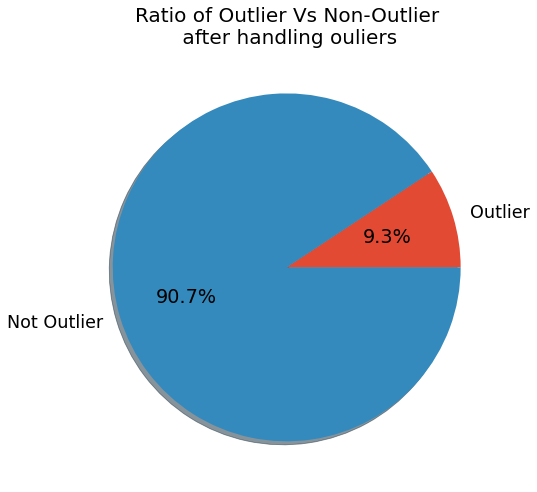

In [76]:
# select all rows that are not outliers
mask = yhat != -1
Outlier =len(data[data['outlier_Afterprepocess']==-1])
notOutlier = len(data[data['outlier_Afterprepocess']==1])

# Data to plot
labels = 'Outlier','Not Outlier'
sizes = [Outlier,notOutlier]

# Plot
plt.figure(figsize=(10,8))
plt.pie(sizes, labels=labels,
autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Ratio of Outlier Vs Non-Outlier\n after handling ouliers', fontsize=20)
sns.set_context("paper", font_scale=2)

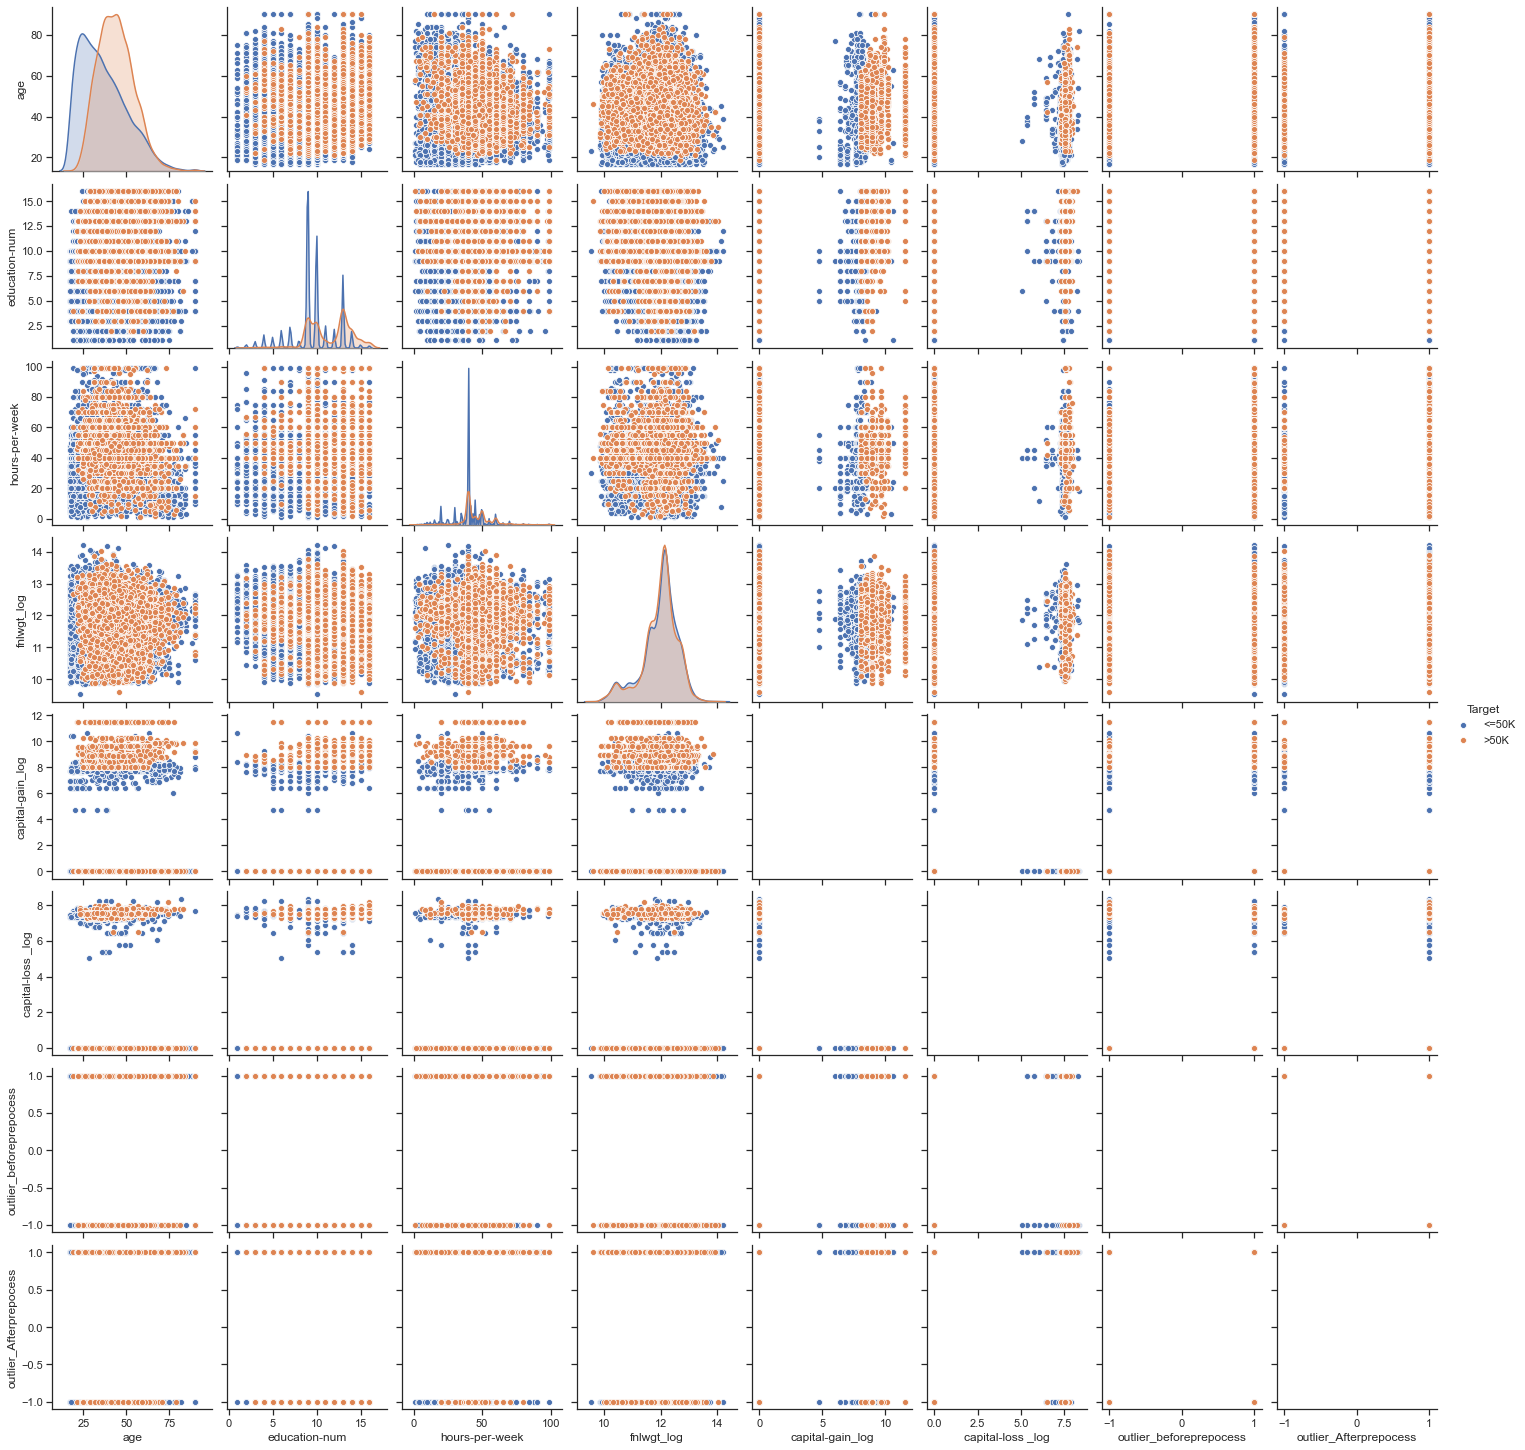

In [77]:
data['Target'] = y

sns.set(style="ticks", color_codes=True)
sns.pairplot(data, hue='Target')



# Dimensionality reduction
## The curse of dimensionality

In fact, to avoid overfitting the number of observations should increase exponentially with the number of features. Since this becomes really problematic for high dimensional datasets this phenomenon is known as the curse of dimensionality. The solution to this is of course to apply dimensionality reduction.

While removing outliers consists of deleting rows from the dataset, feature selection consists of deleting columns that do not contribute to the prediction. There is a wide variety of methods, such as analysis of its correlation with the target, importance analysis and recursive elimination.


# Initil Preprocess pipe after all those Workflows :
This is just used for  features reduction selection :


In [97]:
classification_cible = "income"
y = clean_reduced_final[classification_cible]
X = clean_reduced_final.drop(['income'], axis=1)
# # select the float columns
num_columns = X.select_dtypes(include=['int64','float64']).columns
# select non-numeric columns
cat_columns = X.select_dtypes(exclude=['int64','float64']).columns

fill_missing_then_one_hot_encoder = make_pipeline(
    SimpleImputer(strategy='most_frequent', fill_value='manquante',add_indicator=True),
    OrdinalEncoder()
)
fill_missing_then_Standar_scaler = make_pipeline( OutlierReplace(),
                                                 SimpleImputer(strategy='median',add_indicator=True),
    StandardScaler()
)

data_preprocess = make_column_transformer(
    ( fill_missing_then_one_hot_encoder , cat_columns),
    ( fill_missing_then_Standar_scaler, num_columns)
)
X_pre =data_preprocess.fit_transform(X)
y_pre= LabelEncoder().fit_transform(y)

## Features with low variance

Now use the VarianceThreshold feature selector to remove these features.

In [99]:
from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=0.001)
df_numeric_r=X[num_columns]
# Fit the selector to normalized head_df
sel.fit(df_numeric_r / df_numeric_r.mean())

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced dataframe
reduced_df = df_numeric_r.loc[:, mask]

print("Dimensionality reduced from {} to {}.".format(df_numeric_r.shape[1], reduced_df.shape[1]))

Dimensionality reduced from 6 to 6.


##  Removing highly correlated features

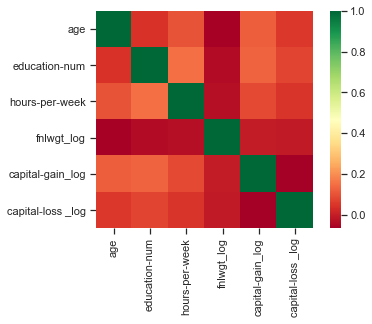

In [100]:
import seaborn as sns 
warnings.filterwarnings("ignore")
sns.heatmap(X.corr(), square=True, cmap='RdYlGn')

In [102]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = X.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]

# Drop the features in the to_drop list
reduced_df = X[num_columns].drop(to_drop, axis=1)
print(to_drop)
print("The reduced dataframe has {} columns.".format(reduced_df.shape[1]))

[]
The reduced dataframe has 6 columns.


# Automatic Recursive Feature Elimination
## Mask1

In [103]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression,LogisticRegression
# Create the RFE with a LogisticRegression estimator and 10 features to select
rfe_LR = RFE(estimator=LogisticRegression(), n_features_to_select = 4, verbose=1)


# Fits the eliminator to the data
rfe_LR.fit(X[num_columns], y)

# Print the features and their ranking (high = dropped early on)
print(dict(zip(X[num_columns].columns, rfe_LR.ranking_)))
mask_LR=rfe_LR.support_
# Print the features that are not eliminated
print(X[num_columns].columns[mask_LR])

# Calculates the test set accuracy
acc = accuracy_score(y, rfe_LR.predict(X[num_columns]))
print("{0:.1%} accuracy on test set.".format(acc))

Fitting estimator with 6 features.
Fitting estimator with 5 features.
{'age': 2, 'education-num': 1, 'hours-per-week': 3, 'fnlwgt_log': 1, 'capital-gain_log': 1, 'capital-loss _log': 1}
Index(['education-num', 'fnlwgt_log', 'capital-gain_log', 'capital-loss _log'], dtype='object')
79.9% accuracy on test set.


# Mask2

In [88]:
# Wrap the feature eliminator around the random forest model
rfe_RFC = RFE(estimator=RandomForestClassifier(), n_features_to_select=4, verbose=1)

# Fits the eliminator to the data
rfe_RFC.fit(X[num_columns], y)

# Create a mask using an attribute of rfe
mask_RFC = rfe_RFC.support_

# Apply the mask to the feature dataset X and print the result
reduced_num_X = X[num_columns].loc[:,mask_RFC]
print(reduced_num_X.columns)
# Calculates the test set accuracy
acc = accuracy_score(y, rfe_RFC.predict(X[num_columns]))
print("{0:.1%} accuracy on test set.".format(acc))

Fitting estimator with 6 features.
Fitting estimator with 5 features.
Index(['age', 'education-num', 'fnlwgt_log', 'capital-gain_log'], dtype='object')
99.4% accuracy on test set.


# Mask3:


In [104]:
from sklearn.ensemble import GradientBoostingClassifier
rfe_gb = RFE(estimator=GradientBoostingClassifier(), 
             n_features_to_select=4, step=1, verbose=1)
rfe_gb.fit(X[num_columns], y)
# Calculate the R squared on the test set
# Assign the support array to gb_mask
gb_mask = rfe_gb.support_
r_squared = rfe_gb.score(X[num_columns], y)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))
# Apply the mask to the feature dataset X and print the result
reduced_num_X = X[num_columns].loc[:,gb_mask]
print(reduced_num_X.columns)


Fitting estimator with 6 features.
Fitting estimator with 5 features.
The model can explain 83.5% of the variance in the test set
Index(['age', 'education-num', 'capital-gain_log', 'capital-loss _log'], dtype='object')


# Combining 3 feature selectors

In [106]:
# Sum the votes of the three models
votes = np.sum([mask_LR, mask_RFC, gb_mask], axis=0)

# Create a mask for features selected by all 3 models
meta_mask = votes >= 3

# Apply the dimensionality reduction on X
X_reduced = X[num_columns].loc[:, meta_mask]
print(X[num_columns].columns)
print(X_reduced.columns)

Index(['age', 'education-num', 'hours-per-week', 'fnlwgt_log',
       'capital-gain_log', 'capital-loss _log'],
      dtype='object')
Index(['education-num', 'capital-gain_log'], dtype='object')


In [137]:
print(X_reduced.columns)

Index(['Mois', 'Age', 'Montant_corr_log', 'capital_social_corr_log',
       'Capacité_remboursement_FCCR_16_corr', 'Fonds_Propres_Total_Bilan_corr',
       'Dettes_Nettes_EBE_16_corr', 'DettesNettes_Fonds_propres_16_corr'],
      dtype='object')


In [108]:
temp1=set(X[num_columns].columns)
s=set(X_reduced.columns)
temp3 = [x for x in temp1 if x not in s]
print("list to drop {}".format(temp3))

list to drop ['hours-per-week', 'capital-loss _log', 'age', 'fnlwgt_log']


In [109]:
list(set(X[num_columns].columns) - set(X_reduced.columns))

['capital-loss _log', 'fnlwgt_log', 'hours-per-week', 'age']

**==> Reducing features can help us  improve the classification performance of our models...**

**==> In the futur we can use : ,SelectKBest,chi2..   and Combining feature selectors**